<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/Assignment20_ClusteringProject_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link:
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

In [ ]:
url = "https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_stocks.csv')
data

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,38.990,14.610,164.6300,888.5500,49.850,219.110,39.43,274.080,31.780,81.03,124.8900,58.820,77.725,330.73,72.430,37.4700,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.2600,124.66,164.620,47.0400,106.27,107.650,124.5901,51.6200,112.3600,89.3500,91.130,55.210,66.5900,120.1300,100.350,65.07,48.730,156.390,60.460,55.700,171.83,73.08,29.620,72.1000,52.160,20.340,34.000,84.370,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,39.010,14.710,164.6800,887.1173,49.940,219.980,39.68,273.990,31.780,81.21,124.9900,58.495,77.940,330.73,72.040,37.5400,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.2600,124.82,164.390,47.0400,106.27,107.650,124.5901,51.5800,112.3600,89.3500,91.210,55.120,66.3550,120.1300,100.030,65.04,48.752,157.190,59.930,55.810,171.54,72.95,29.640,72.1800,52.245,20.320,34.070,84.370,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,38.910,14.640,164.9050,887.5110,49.860,219.390,39.60,274.275,31.765,81.21,125.0000,58.470,77.815,330.73,72.055,37.6100,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.1900,124.82,165.300,46.9800,106.38,107.310,124.7100,51.4600,112.1300,89.1600,91.080,55.090,66.2417,120.3368,100.390,65.08,48.720,157.070,60.080,55.640,171.55,72.98,29.670,72.3192,52.200,20.260,34.110,84.585,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,38.840,14.630,164.7600,886.2700,49.915,219.300,39.57,273.590,31.830,81.13,124.7300,58.420,77.950,330.73,72.140,37.6200,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.0000,124.82,165.160,46.8097,106.33,107.490,124.4889,51.3800,112.0100,89.0600,91.015,55.210,66.1700,120.3100,100.390,64.95,48.695,156.945,60.390,55.640,171.26,73.09,29.790,72.4300,52.140,20.200,33.970,84.460,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,38.930,14.670,164.8500,886.5800,49.915,219.180,39.55,273.540,31.830,81.12,124.8300,58.600,78.050,330.73,72.215,37.6250,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.0100,124.82,165.240,47.0200,106.56,107.480,125.2449,51.4347,112.2300,89.1000,91.000,55.320,66.1800,120.3600,100.110,64.84,48.630,157.160,60.180,55.680,171.18,72.99,29.710,72.4800,52.140,20.220,34.000,84.470,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df = data.copy()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [ ]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,12.624442,167.030297,968.747188,57.683091,238.598238,33.413552,272.957640,32.652696,89.325485,126.928020,64.227338,69.502897,348.719389,73.025271,39.607469,121.375413,165.457076,32.139336,51.284218,127.416660,65.928564,81.014205,26.051030,25.216388,62.413344,75.477313,107.713287,34.794506,432.201844,...,18.236453,19.777207,73.184257,38.363101,116.967866,181.850786,47.086121,107.603907,109.019095,113.124563,51.863284,119.265065,95.693963,98.311314,57.134291,65.903890,123.767195,89.828376,66.790525,46.574448,176.242257,62.352736,53.587272,181.971118,73.777928,30.102558,77.066819,55.411353,19.272765,33.248472,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,1.172758,6.910730,38.966684,4.567420,12.824877,3.975551,13.763994,1.178095,5.746178,6.840787,2.634135,3.436516,25.257095,3.230921,1.225993,3.833343,10.024798,0.985571,2.377096,4.927756,4.133884,3.225397,1.976801,2.176216,2.624382,4.669540,9.865916,1.099296,17.370211,...,1.380061,1.437846,5.561782,1.159465,5.836284,9.608218,1.656671,2.717122,3.275806,5.662877,0.760720,3.242153,4.385522,5.335147,3.563356,1.859369,5.155408,9.226681,2.005502,1.767864,8.983449,1.540708,1.289050,9.512629,1.464602,0.927709,2.524082,2.424774,0.362162,0.908009,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,9.871000,152.300000,884.670000,48.410000,208.560000,28.020000,244.280000,30.460000,80.000000,113.771600,58.210000,63.510000,312.660000,68.500000,37.025000,114.840000,150.000000,30.365000,46.101500,119.540000,57.530000,74.110000,22.110000,20.825000,56.090000,66.020000,87.940000,31.890000,396.940000,...,15.090000,16.125000,61.335000,35.460000,105.010000,164.390000,43.550000,101.080000,102.140000,100.735000,49.560000,111.290000,88.1

In [ ]:
for i in df:
  if df[i].isna().sum() > 0:
    print(df[i].isna().sum())

# as we are not grtting any output, so we do not have any null value

In [ ]:
df.drop(columns=['DATE', 'SP500'], inplace = True)

## 1. There are various stocks for which we have collected a data set, 

###which all stocks are apparently similar in performance?


In [ ]:
df_cor = df.copy()

In [ ]:
cor = df_cor.corr()

In [ ]:

cor[cor["NASDAQ.AAL"] > 0.8][:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.528900,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.216640,-0.245775,-0.242702,0.436888,-0.720154,0.572157,0.692882,0.395456,-0.203778,0.516034,...,0.267722,0.308307,0.419428,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.335280,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,0.458554,1.000000,0.794613,0.853011,-0.706765,0.099298,0.393907,0.558280,0.354618,0.765360,-0.845738,0.201662,0.250861,0.586015,0.370540,-0.383131,-0.553583,0.582725,0.519020,0.802314,-0.248106,-0.435062,-0.435498,0.363848,-0.580344,0.783247,0.790327,0.663256,-0.386333,0.557038,...,0.093214,0.147237,0.313264,0.758763,-0.267055,0.641236,0.289724,-0.144524,0.446912,-0.202990,0.490536,0.718506,0.571231,0.796943,0.221181,0.218149,0.380837,-0.509281,0.535571,-0.523253,0.778608,0.447343,-0.020211,0.593810,0.325450,0.105824,0.511616,0.810428,-0.440756,-0.271281,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,0.611555,0.906601,0.866586,0.866109,-0.838089,0.275234,0.454457,0.724304,0.513508,0.751645,-0.868138,0.341722,0.408128,0.534086,0.564348,-0.538066,-0.607019,0.530728,0.609950,0.869717,-0.413974,-0.578281,-0.582465,0.184949,-0.636732,0.831234,0.739087,0.747946,-0.371187,0.713824,...,-0.010416,0.049820,0.147685,0.797691,-0.355288,0.791774,0.446670,-0.239229,0.598696,-0.256367,0.572385,0.697875,0.691503,0.824378,0.418736,0.400097,0.277766,-0.613529,0.588649,-0.482221,0.832491,0.515128,-0.021098,0.529221,0.466755,0.146198,0.562946,0.873718,-0.485625,-0.424527,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,0.367774,0.691795,0.343264,0.409120,-0.357435,-0.142523,0.548542,0.154340,0.223434,0.627321,-0.481786,-0.284482,-0.143319,0.214650,0.269989,-0.186335,-0.383453,0.760950,0.076061,0.359546,0.058919,0.067145,0.077766,0.715452,-0.706110,0.313849,0.487803,0.133785,-0.028832,0.198702,...,0.625094,0.633184,0.658975,0.522946,0.233878,0.261358,-0.012752,0.258719,0.170251,-0.214172,0.338810,0.782164,0.024966,0.676587,-0.192239,0.194132,0.692796,0.084401,0.614585,-0.733562,0.640406,0.010557,0.406962,0.865903,-0.013378,0.042733,-0.015446,0.717739,-0.380904,0.118708,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,0.548895,0.825347,0.590629,0.612349,-0.609778,0

so, here are the stocks which show thw relatively similar performance

In [ ]:
from sklearn.preprocessing import StandardScaler

features = df.values
sc = StandardScaler()

x_scaled = sc.fit_transform(features)

In [ ]:
x_scaled.shape

(41266, 500)

### Determining optimal number of components for PCA looking at the explained variance as a function of the components

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_scaled)

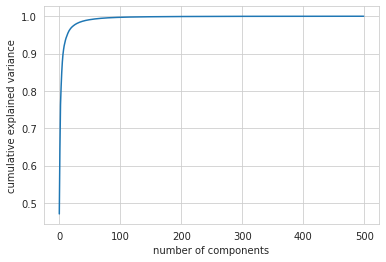

In [ ]:
sns.set_style('whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### Here we see that we'd need about 100 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations

**Apply PCA to reduce the number of dimensions from 502 to 2 dimensions for better data visualization.**

In [ ]:
print(len(pca.components_[0]))

500


In [ ]:
pca = PCA(n_components = 2).fit(x_scaled)
print(f'@ Explained variance : \n\n{pca.explained_variance_}')
print('-'*80)
print(f'@ PCA components : \n\n{pca.components_}')
print('-'*80)

x_transformed = pca.transform(x_scaled)

print(f'@ Transformed Feature values first five rows :\n\n{x_transformed[:5,:]}')
print('-'*80)
print(f'@ Transformed feature shape : \n\n{x_transformed.shape}')
print('-'*80)
print(f'@ Original Feature shape : \n\n{x_scaled.shape}')
print('-'*80)

x_retransformed = pca.inverse_transform(x_transformed)

print(f'@ Restransformed Feature shape : \n\n{x_retransformed.shape}')
print('-'*80)
print(f'@ Retransformed Feature values first five rows : \n\n{x_retransformed[:5,:]}')
print('-'*80)

In [ ]:
# finding out the optimal number of clusters using kmeans clustering

In [ ]:
from sklearn.cluster import KMeans

wcss = [] # within cluster sum of squared distances (wcss/inertia)

for i in range(1,21):

  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(x_transformed)
  wcss.append(kmeans.inertia_)


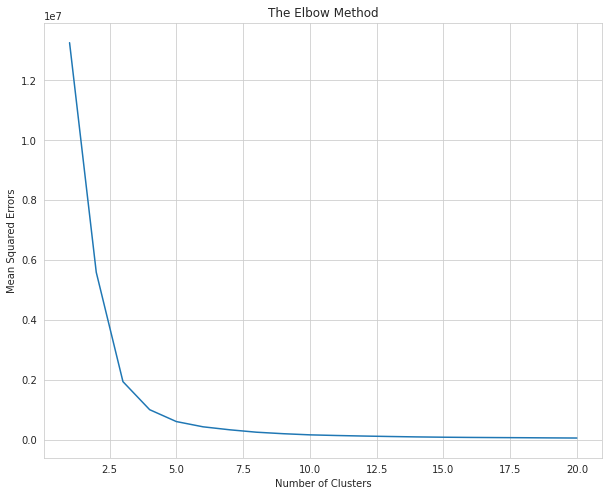

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

In [ ]:
!pip install scikit-plot

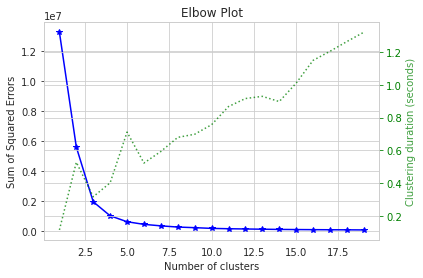

In [ ]:
import scikitplot

scikitplot.cluster.plot_elbow_curve(KMeans(),
                                    x_transformed,
                                    cluster_ranges = range(1,20))


Optimum number of cluster from the elbow method is determined to be 5

**Now applying kmeans clustering to find stocks which are similar in performance**

In [ ]:
kmeans = KMeans(n_clusters = 5,
                random_state = 0,
                init = 'k-means++')
kmeans.fit(x_transformed)
y_kmeans = kmeans.fit_predict(x_transformed)
labels = kmeans.labels_

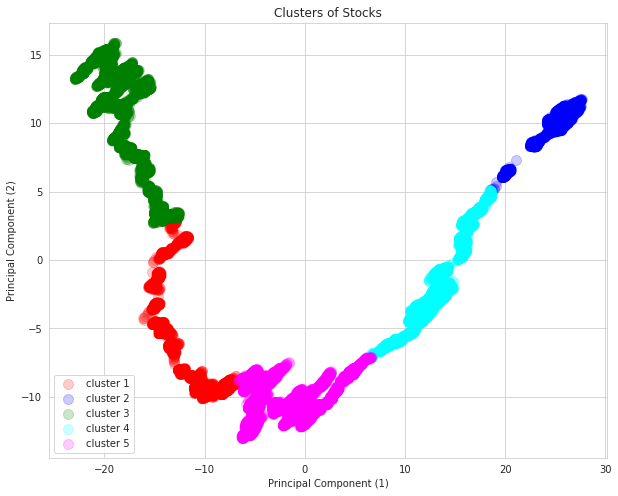

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(x_transformed[y_kmeans == 0, 0],
            x_transformed[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'cluster 1', alpha = 0.2)
plt.scatter(x_transformed[y_kmeans == 1, 0],
            x_transformed[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'cluster 2', alpha = 0.2)
plt.scatter(x_transformed[y_kmeans == 2, 0],
            x_transformed[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'cluster 3', alpha = 0.2)
plt.scatter(x_transformed[y_kmeans == 3, 0],
            x_transformed[y_kmeans == 3, 1],
            s = 100, c = 'cyan', label = 'cluster 4', alpha = 0.2)
plt.scatter(x_transformed[y_kmeans == 4, 0],
            x_transformed[y_kmeans == 4, 1],
            s = 100, c = 'magenta', label = 'cluster 5', alpha = 0.2)

#plt.scatter(kmeans.cluster_centers_[:, 0],
#            kmeans.cluster_centers_[:, 1],
#            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()


The above 5 clusters shows the stocks which are similar in stock performance

##2.  How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

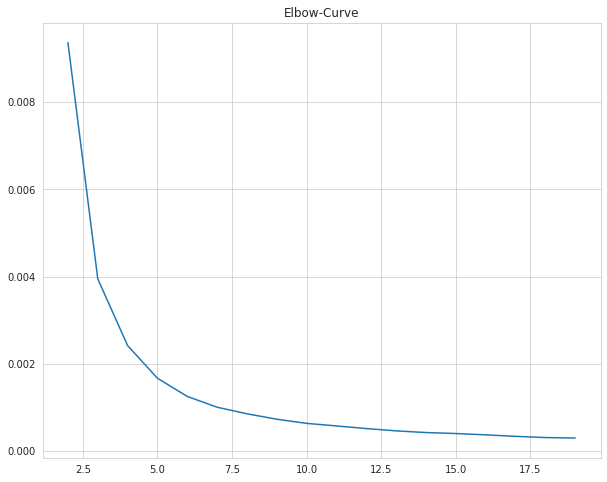

In [ ]:
# We will try to find the optimal number of clusters and assign each stock to a specific cluster
# Calculate the average annual percentage return and volatilities over a theoritical one year period

from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

From the above Elbow curve we see that the curve has a steep at cluster no.4 or 5.

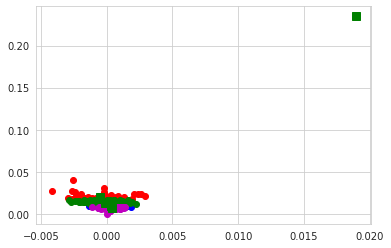

In [ ]:
from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

Ok, so it looks like we have an outlier in the data which is skewing the results and making it difficult to actually see what is going on for all the other stocks. Let’s take the easy route and just delete the outlier from our data set and run this again.

In [ ]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


Ok so let’s drop the stock ‘BHF and recreate the necessary data arrays.

In [ ]:
#drop the relevant stock from our data
data.drop(['NYSE.XRX'],inplace=True,axis=1)

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
 
#recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

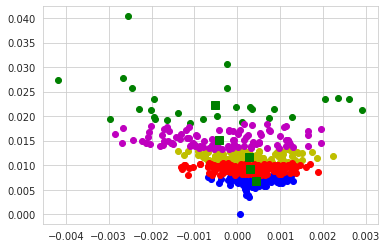

In [ ]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

Finally to get the details of which stock is actually in which cluster we can run the following line of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format:

In [ ]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]
#for detail in details:
#   print(list(detail))

[('DATE', 0),
 ('SP500', 0),
 ('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 2),
 ('NASDAQ.ADBE', 2)]

In [ ]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]
#for detail in details:
#   print(list(detail))

[('DATE', 0),
 ('SP500', 0),
 ('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 2),
 ('NASDAQ.ADBE', 2)]

So there you have it, we now have a list of each of the stocks in the S&P 500, along with which one of 5 clusters they belong to with the clusters being defined by their return and volatility characteristics. We also have a visual representation of the clusters in chart format.

In [ ]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

2    159
1    122
0     98
4     94
3     28
Name: Cluster_No, dtype: int64

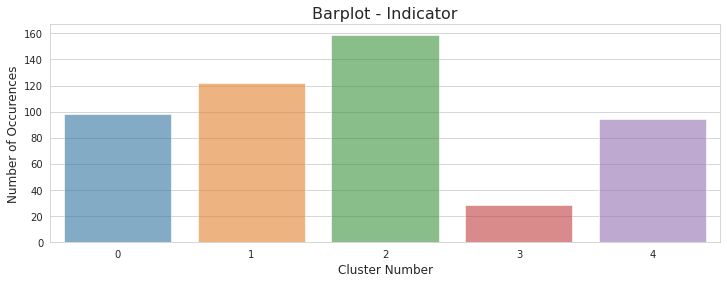

In [ ]:
import seaborn as sns
ind = df.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()


## 3. Identify which all stocks are moving together and which all stocks are different from each other.

 

In [ ]:
df = data.copy()

In [ ]:
df['labels'] = labels

In [ ]:
df['labels'].unique().tolist()


[1, 3, 4, 0, 2]

In [ ]:
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 1 the number of similar stock performances is : 5875 

For lablel 3 the number of similar stock performances is : 8623 

For lablel 4 the number of similar stock performances is : 11153 

For lablel 0 the number of similar stock performances is : 5877 

For lablel 2 the number of similar stock performances is : 9738 


In [ ]:
from sklearn.cluster import SpectralClustering
hc = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors')
hc.fit(x_transformed)


SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=5,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=None)

In [ ]:
hc.fit_predict(x_transformed)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_labels = hc.labels_


In [ ]:
len(y_labels),np.unique(y_labels)


(41266, array([0, 1, 2, 3, 4], dtype=int32))

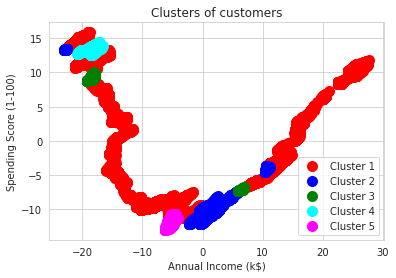

In [ ]:
# Visualising the clusters
X = x_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
df2 = df.copy()
df2['labels'] = y_labels
for i in df2['labels'].unique().tolist():
    count = df2[df2['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 0 the number of similar stock performances is : 31794 

For lablel 1 the number of similar stock performances is : 5471 

For lablel 2 the number of similar stock performances is : 467 

For lablel 4 the number of similar stock performances is : 2551 

For lablel 3 the number of similar stock performances is : 983 


For the given data set KMeans Clustering creates a better and distinct clustering compared to Spectral Clustering